In [1]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [2]:
import zipfile
import io
import pandas as pd

def load_file(file_path, file_name, date_col=None):
    # Open the zip file
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        # Check if the CSV file is present in the zip file
        if file_name in zip_ref.namelist():
            # Read the CSV content into a pandas DataFrame
            with zip_ref.open(file_name) as csv_file:
                df = pd.read_csv(io.TextIOWrapper(csv_file, 'utf-8'), parse_dates=[date_col], index_col=date_col)
                csv_file.close()
    return df


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None


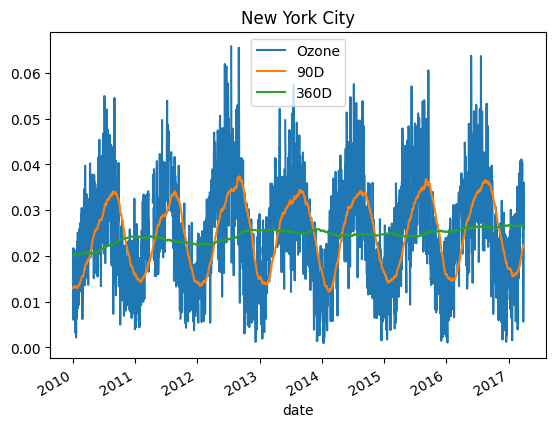

'\nAmazing job! Do the different rolling windows help you see any long term trends that are hard to spot in the original data?\n'

In [3]:
# exercise 01

"""
Rolling average air quality since 2010 for new york city

The last video was about rolling window functions. To practice this new tool, you'll start with air quality trends for New York City since 2010. In particular, you'll be using the daily Ozone concentration levels provided by the Environmental Protection Agency to calculate & plot the 90 and 360 day rolling average.
"""

# Instructions

"""
We have already imported pandas as pd and matplotlib.pyplot as plt.

    Use pd.read_csv() to import 'ozone.csv', creating a DateTimeIndex from the 'date' column using parse_dates and index_col, and assign the result to data.
    Add the columns '90D' and '360D' containing the 90 and 360 rolling calendar day .mean() for the column 'Ozone'.
    Plot data starting 2010, setting 'New York City' as title.

"""

# solution
import matplotlib.pyplot as plt

# Import and inspect ozone data here
#data = pd.read_csv('ozone.csv', parse_dates=['date'], index_col='date')
data = load_file(path_data+'air_quality_data.zip', 'ozone_nyc.csv', 'date')
print(data.info())

# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data.Ozone.rolling('90D').mean()
data['360D'] = data.Ozone.rolling('360D').mean()

# Plot data
data.loc['2010':].plot(title='New York City')
plt.show()


#----------------------------------#

# Conclusion

"""
Amazing job! Do the different rolling windows help you see any long term trends that are hard to spot in the original data?
"""

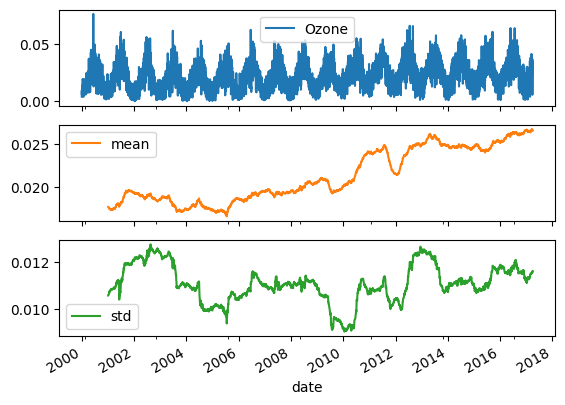

"\nPerfect! How does adding the standard deviation help you understand what's happening in the orignal series?\n"

In [15]:
# exercise 02

"""
Rolling 360-day median & std. deviation for nyc ozone data since 2000

The last video also showed you how to calculate several rolling statistics using the .agg() method, similar to .groupby().

Let's take a closer look at the air quality history of NYC using the Ozone data you have seen before. The daily data are very volatile, so using a longer term rolling average can help reveal a longer term trend.

You'll be using a 360 day rolling window, and .agg() to calculate the rolling mean and standard deviation for the daily average ozone values since 2000.
"""

# Instructions

"""
We have already imported pandas as pd, and matplotlib.pyplot as plt.

    
    Use pd.read_csv() to import 'ozone.csv', creating a DateTimeIndex from the 'date' column using parse_dates and index_col, assign the result to data, and drop missing values using .dropna().
    
    Select the 'Ozone' column and create a .rolling() window using 360 periods, apply .agg() to calculate the mean and std, and assign this to rolling_stats.
    
    Use .join() to concatenate data with rolling_stats, and assign to stats.
    Plot stats using subplots.

"""

# solution

# Import and inspect ozone data here
#data = pd.read_csv('ozone.csv', parse_dates=['date'], index_col='date').dropna()
data = load_file(path_data+'air_quality_data.zip', 'ozone_nyc.csv', 'date').dropna()

# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(360).agg(['mean','std'])

# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

# Plot stats
stats.plot(subplots=True)
plt.show()


#----------------------------------#

# Conclusion

"""
Perfect! How does adding the standard deviation help you understand what's happening in the orignal series?
"""

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6167 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 225.4 KB
None


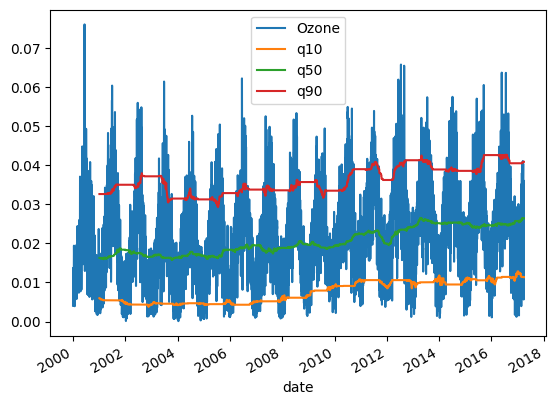

'\nFantastic job! The rolling quantiles help show the volatility of the series.\n'

In [16]:
# exercise 03

"""
Rolling quantiles for daily air quality in nyc

You learned in the last video how to calculate rolling quantiles to describe changes in the dispersion of a time series over time in a way that is less sensitive to outliers than using the mean and standard deviation.

Let's calculate rolling quantiles - at 10%, 50% (median) and 90% - of the distribution of daily average ozone concentration in NYC using a 360-day rolling window.
"""

# Instructions

"""
We have already imported pandas as pd and matplotlib.pyplot as plt. We have also loaded the ozone data from 2000-2017 into the variable data.

    Apply .resample() with daily frequency 'D' to data and apply .interpolate() to fill missing values, and reassign to data.
    Inspect the result using .info().
    Create a .rolling() window using 360 periods, select the column 'Ozone', and assign the result to rolling.
    Insert three new columns, 'q10', 'q50' and 'q90' into data, calculating the respective quantiles from rolling.
    Plot data.

"""

# solution

# Resample, interpolate and inspect ozone data here
#data = data.resample('D').interpolate()
print(data.info())

# Create the rolling window
rolling = data.Ozone.rolling(360)

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(0.1)
data['q50'] = rolling.quantile(0.5)
data['q90'] = rolling.quantile(0.9)

# Plot the data
data.plot()
plt.show()


#----------------------------------#

# Conclusion

"""
Fantastic job! The rolling quantiles help show the volatility of the series.
"""

In [17]:
data = load_file(path_data+'stock_data.zip','google.csv','Date')
data.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [36]:
# exercise 04

"""
Cumulative sum vs .diff()

In the video, you have learned about expanding windows that allow you to run cumulative calculations.

The cumulative sum method has in fact the opposite effect of the .diff() method that you came across in chapter 1.

To illustrate this, let's use the Google stock price time series, create the differences between prices, and reconstruct the series using the cumulative sum.
"""

# Instructions

"""
We have already imported pandas as pd and matplotlib.pyplot as plt. We have also loaded google stock prices into the variable data

    
    Apply .diff() to data, drop missing values, and assign the result to differences.
    
    Use .first('D') to select the first price from data, and assign it to start_price.
    
    Use .append() to combine start_price and differences, apply .cumsum() and assign this to cumulative_sum.
    
    Use .equals() to compare data and cumulative_sum, and print the result.

"""

# solution

# Calculate differences
differences = data.diff().dropna()

# Select start price
start_price = data.iloc[0,:]

# Calculate cumulative sum
cumulative_sum = pd.concat([start_price, differences]).cumsum()

# Validate cumulative sum equals data
print(data.equals(cumulative_sum))

#----------------------------------#

# Conclusion

"""
Amazing work! The .cumsum() method allows you to reconstruct the original data from the differences.
"""

False


'\nAmazing work! The .cumsum() method allows you to reconstruct the original data from the differences.\n'

In [42]:
data = load_file(path_data+'stock_data.zip', 'apple_google.csv', 'Date')
data.head()

,AAPL,GOOG
Date,,
2010-01-04,NaN,313.06
2010-01-05,NaN,311.68
2010-01-06,NaN,303.83
2010-01-07,NaN,296.75
2010-01-08,NaN,300.71


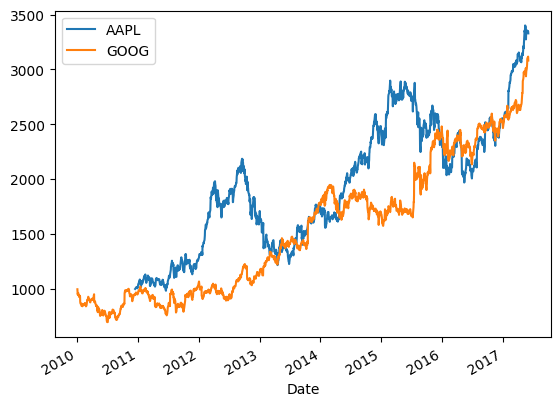

"\nAwesome! Now let's take a look at the rolling annual returns on this investment.\n"

In [43]:
# exercise 05

"""
Cumulative return on $1,000 invested in google vs apple I

To put your new ability to do cumulative return calculations to practical use, let's compare how much $1,000 would be worth if invested in Google ('GOOG') or Apple ('AAPL') in 2010.
"""

# Instructions

"""
We have already imported pandas as pd, and matplotlib.pyplot as plt. We have also loaded Google and Apple stock prices in a variable data.

    
    Define a variable investment with the value 1000.
    
    Calculate returns by applying .pct_change() to data.
    
    Add 1 to returns and assign this to returns_plus_one, then apply .cumprod() to returns_plus_one and assign the result to cumulative_return.
    
    Multiply cumulative_return by investment, and plot the result.

"""

# solution

# Define your investment
investment = 1000

# Calculate the daily returns here
returns = data.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns + 1
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot()
plt.show()

#----------------------------------#

# Conclusion

"""
Awesome! Now let's take a look at the rolling annual returns on this investment.
"""

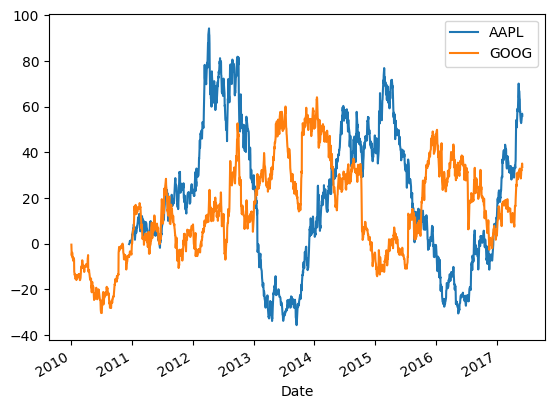

"\nPerfect! Do you think it's better to invest in Google or Apple?\n"

In [44]:
# exercise 06

"""
Cumulative return on $1,000 invested in google vs apple II

Apple outperformed Google over the entire period, but this may have been different over various 1-year sub periods, so that switching between the two stocks might have yielded an even better result.

To analyze this, calculate that cumulative return for rolling 1-year periods, and then plot the returns to see when each stock was superior.
"""

# Instructions

"""
We have already imported pandas as pd and matplotlib.pyplot as plt. We have also loaded the GOOG and AAPL close prices from the last exercise into data.

    
    Define a multi_period_return() function that returns the cumulative return from an array of period returns.
    
    Calculate daily_returns by applying .pct_change() to data.
    
    Create a '360D' .rolling() window on daily_returns, and .apply() multi_period_returns. Assign the result to rolling_annual_returns.
    
    Plot rolling_annual_returns after multiplying it by 100.

"""

# solution

# Import numpy
import numpy as np

# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) -1
    
# Calculate daily returns
daily_returns = data.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot()
plt.show()

#----------------------------------#

# Conclusion

"""
Perfect! Do you think it's better to invest in Google or Apple?
"""

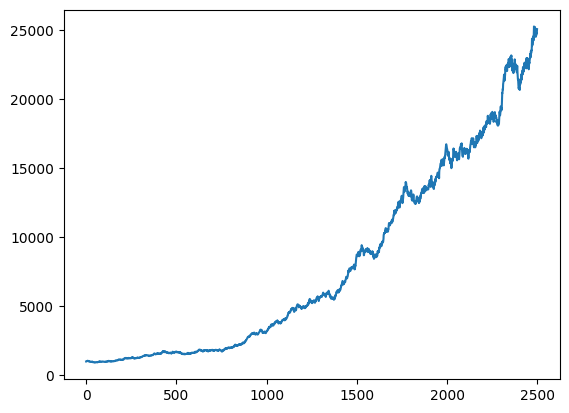

'\nGreat work! Are you ready to get started on the next part of your random walk?\n'

In [45]:
# exercise 07

"""
Random walk I

In the last video, you have seen how to generate a random walk of returns, and how to convert this random return series into a random stock price path.

In this exercise, you'll build your own random walk by drawing random numbers from the normal distribution with the help of numpy.
"""

# Instructions

"""
We have already imported pandas as pd, functions normal and seed from numpy.random, and matplotlib.pyplot as plt.

    Set seed to 42.
    Use normal to generate 2,500 random returns with the parameters loc=.001, scale=.01 and assign this to random_walk.
    Convert random_walk to a pd.Series object and reassign it to random_walk.
    Create random_prices by adding 1 to random_walk and calculating the cumulative product.
    Multiply random_prices by 1,000 and plot the result for a price series starting at 1,000.

"""

# solution

# Set seed here
np.random.seed(42)

# Create random_walk
random_walk = np.random.normal(loc=.001, scale=.01, size=2500)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = random_walk.add(1).cumprod()

# Plot random_prices here
random_prices.mul(1000).plot()
plt.show()


#----------------------------------#

# Conclusion

"""
Great work! Are you ready to get started on the next part of your random walk?
"""

In [47]:
fb = load_file(path_data+'stock_data.zip', 'fb.csv', 'date')
fb.head()

,close
date,
2012-05-17,38.00
2012-05-18,38.23
2012-05-21,34.03
2012-05-22,31.00
2012-05-23,32.00


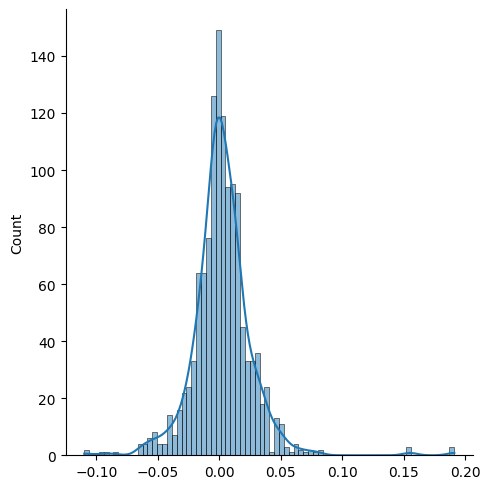

'\nAwesome! Get ready to finish up this random walk!\n'

In [59]:
# exercise 08

"""
Random walk II

In the last video, you have also seen how to create a random walk of returns by sampling from actual returns, and how to use this random sample to create a random stock price path.

In this exercise, you'll build a random walk using historical returns from Facebook's stock price since IPO through the end of May 31, 2017. Then you'll simulate an alternative random price path in the next exercise.
"""

# Instructions

"""
We have already imported pandas as pd, choice and seed from numpy.random, seaborn as sns, and matplotlib.pyplot as plt. We have also imported the FB stock price series since IPO in May 2012 as the variable fb. Inspect this using .head().

    
    Set seed to 42.
    
    Apply .pct_change() to generate daily Facebook returns, drop missing values, and assign to daily_returns.
    
    Create a variable n_obs that contains the .count() of Facebook daily_returns.
    
    Use choice() to randomly select n_obs samples from daily_returns, and assign to random_walk.
    
    Convert random_walk to a pd.Series and reassign it to itself.
    
    Use sns.distplot() to plot the distribution of random_walk.

"""

# solution
import seaborn as sns

# Set seed here
np.random.seed(42)

# Calculate daily_returns here
daily_returns = fb.pct_change().dropna()

# Get n_obs
n_obs = daily_returns.count().iloc[0]

# Create random_walk
random_walk = np.random.choice(daily_returns.close.values, size=n_obs)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Plot random_walk distribution
sns.displot(random_walk, kde=True)
plt.show()



#----------------------------------#

# Conclusion

"""
Awesome! Get ready to finish up this random walk!
"""

In [65]:
start

,close
date,
2012-05-17,38.0


/tmp/ipykernel_235337/1972103244.py:28: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  start = fb.close.first('D')
/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


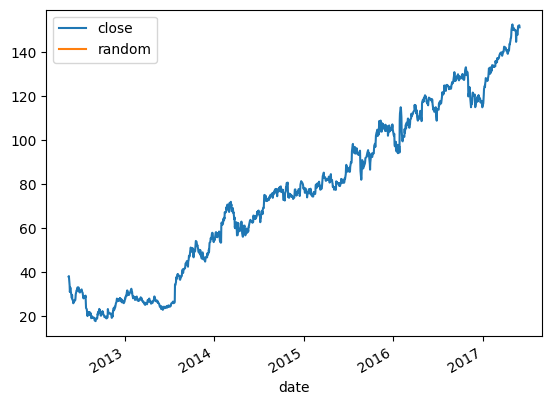

'\nAmazing! How did you like generating random stock prices?\n'

In [71]:
# exercise 09

"""
Random walk III

In this exercise, you'll complete your random walk simulation using Facebook stock returns over the last five years. You'll start off with a random sample of returns like the one you've generated during the last exercise and use it to create a random stock price path.
"""

# Instructions

"""
We have already imported pandas as pd, choice and seed from numpy.random, and matplotlib.pyplot as plt. We have loaded the Facebook price as a pd.DataFrame in the variable fb and a random sample of daily FB returns as pd.Series in the variable random_walk.

    
    Select the first Facebook price by applying .first('D') to fb.price, and assign to start.
    
    Add 1 to random_walk and reassign it to itself, then .append() random_walk to start and assign this to random_price.
    
    Apply .cumprod() to random_price and reassign it to itself.
    
    Insert random_price as new column labeled random into fb and plot the result.

"""

# solution

# Select fb start price here
start = fb.close.first('D')

# Add 1 to random walk and append to start
random_walk = random_walk.add(1)
random_price = pd.concat([start, random_walk], axis=0)

# Calculate cumulative product here
random_price = random_price.cumprod()

# Insert into fb and plot
fb['random'] = random_price
fb.plot()
plt.show()


#----------------------------------#

# Conclusion

"""
Amazing! How did you like generating random stock prices?
"""

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4001 entries, 2001-07-05 to 2017-05-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    4000 non-null   float64
 1   AMZN    4000 non-null   float64
 2   IBM     4000 non-null   float64
 3   WMT     4000 non-null   float64
 4   XOM     4000 non-null   float64
dtypes: float64(5)
memory usage: 187.5 KB
None
          AAPL      AMZN       IBM       WMT       XOM
AAPL  1.000000  0.208731  0.460568 -0.183553  0.336413
AMZN  0.208731  1.000000  0.346407 -0.367620 -0.133965
IBM   0.460568  0.346407  1.000000  0.155445  0.367253
WMT  -0.183553 -0.367620  0.155445  1.000000  0.178833
XOM   0.336413 -0.133965  0.367253  0.178833  1.000000


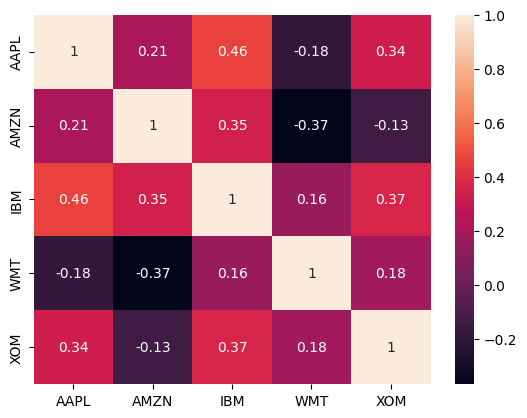

'\nGreat work! Heatmaps are a great way to visualize correlation matrices.\n'

In [73]:
# exercise 10

"""
Annual return correlations among several stocks

You have seen in the video how to calculate correlations, and visualize the result.

In this exercise, we have provided you with the historical stock prices for Apple (AAPL), Amazon (AMZN), IBM (IBM), WalMart (WMT), and Exxon Mobile (XOM) for the last 4,000 trading days from July 2001 until the end of May 2017.

You'll calculate the year-end returns, the pairwise correlations among all stocks, and visualize the result as an annotated heatmap.
"""

# Instructions

"""
We have already imported pandas as pd, seaborn as sns, and matplotlib.pyplot as plt. We have loaded the daily close price for the five stocks in a variable called data.

    Inspect using .info().
    Apply .resample() with year-end frequency (alias: 'A') to data and select the .last() price from each subperiod; assign this to annual_prices.
    Calculate annual_returns by applying .pct_change() to annual_prices.
    Calculate correlations by applying .corr() to annual_returns and print the result.
    Visualize correlations as an annotated sns.heatmap().

"""

# solution

data = load_file(path_data+'stock_data.zip', '5_stocks.csv', 'Date')

# Inspect data here
print(data.info())

# Calculate year-end prices here
annual_prices = data.resample('A').last()

# Calculate annual returns here
annual_returns = annual_prices.pct_change()

# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True)
plt.show()

#----------------------------------#

# Conclusion

"""
Great work! Heatmaps are a great way to visualize correlation matrices.
"""